In [1]:
import pandas as pd

# DATAPATH
file_path = '/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv'

df = pd.read_csv(file_path)

print(df)

# PRINT COL NAME 
print(df.columns)


# CHECK MISSING VALUES
print("Missing Values:")
print(df.isnull().sum())

# PRINT UNIQUE VALUES FOR CATEGORICAL COLUMNS
print("\nUnique Values for Categorical Columns:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].unique()}")


      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

In [2]:
import pandas as pd
import plotly.express as px

# DATAPATH
file_path = '/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv'
df = pd.read_csv(file_path)

# FIX COL
df_filtered = df[['age', 'sex', 'max heart rate', 'target']]

# MAP SEX VALUES TO MEANINGFULL LABELS
sex_mapping = {0: 'Female', 1: 'Male'}
df_filtered['sex'] = df_filtered['sex'].map(sex_mapping)

# SCATTER PLOT
fig = px.scatter(df_filtered, x='age', y='max heart rate', color='sex', symbol='target',
                 title='Relationship between Age, Gender, and Max Heart Rate',
                 labels={'age': 'Age', 'max heart rate': 'Max Heart Rate', 'sex': 'Gender'},
                 hover_data=['sex', 'max heart rate'])


fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))


fig.show()


/tmp/ipykernel_33/2173651406.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sex'] = df_filtered['sex'].map(sex_mapping)


In [3]:
import pandas as pd
import plotly.express as px

# DATAPATH
file_path = '/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv'
df = pd.read_csv(file_path)

# FIX COL
df_filtered = df[['age', 'sex', 'cholesterol', 'max heart rate']]

# MAPPING SEX VALUES 
sex_mapping = {0: 'Female', 1: 'Male'}
df_filtered['sex'] = df_filtered['sex'].map(sex_mapping)

# SCATTER PLOT
fig = px.scatter(df_filtered, x='age', y='max heart rate', color='sex', size='cholesterol',
                 title='Relationship between Age, Sex, Cholesterol, and Max Heart Rate',
                 labels={'age': 'Age', 'max heart rate': 'Max Heart Rate', 'cholesterol': 'Cholesterol', 'sex': 'Gender'},
                 hover_data=['age', 'sex', 'cholesterol', 'max heart rate'])


fig.show()


/tmp/ipykernel_33/1945584358.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# DATAPATH
file_path = '/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv'

df = pd.read_csv(file_path)

# FEATURE AND TARGET COL
X = df.drop('target', axis=1)
y = df['target']

# HANDLING OUTLIERS USING Z SCORE
z_scores = zscore(X.select_dtypes(include=['int64', 'float64']))
abs_z_scores = abs(z_scores)
outlier_rows = (abs_z_scores > 3).all(axis=1)
X = X[~outlier_rows]
y = y[~outlier_rows]

# NORMALIZE AND SCALE
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

# SPLITTING INTO TRAIN AND TEST SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (952, 11)
y_train shape: (952,)
X_test shape: (238, 11)
y_test shape: (238,)


2024-04-22 05:22:09.607567: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 05:22:09.607741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 05:22:09.780919: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6405 - loss: 0.6201
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8123 - loss: 0.4360 
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8383 - loss: 0.3805 
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8398 - loss: 0.3550 
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8612 - loss: 0.3330 
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.3303 
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8695 - loss: 0.3176 
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8641 - loss: 0.3290 
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8780 - loss: 0.3087 
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8864 - loss: 0.2999 
Test Accuracy: 88.66%
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

           0       0.90      0.84      0.87   

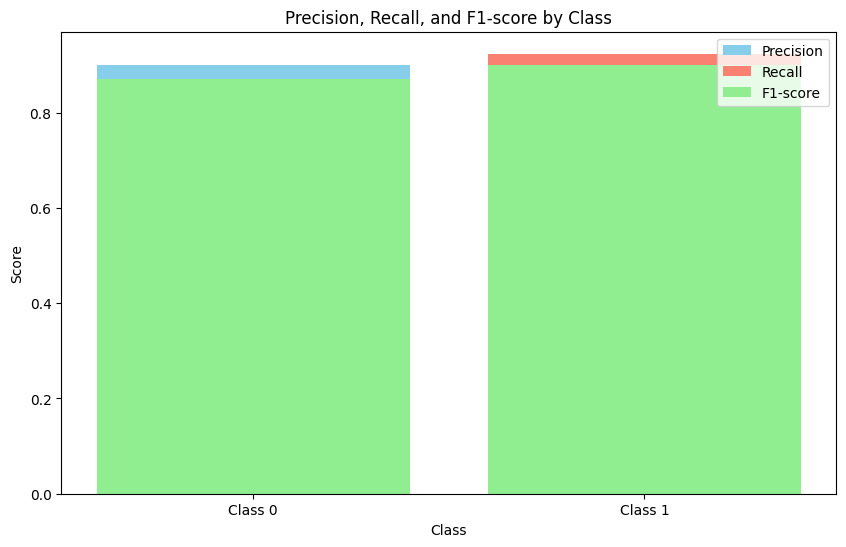

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# DATAPATH
file_path = '/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv'

df = pd.read_csv(file_path)

# FEATURE AND TARGET COL
X = df.drop('target', axis=1)
y = df['target']

# HANDLING OUTLIERS USING Z SCORE
z_scores = zscore(X.select_dtypes(include=['int64', 'float64']))
abs_z_scores = np.abs(z_scores)
outlier_rows = (abs_z_scores > 3).all(axis=1)
X = X[~outlier_rows]
y = y[~outlier_rows]

# NORMALIZE AND SCALE
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

# SPLITTING INTO TRAIN AND TEST SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# BUILD A SEQUENTIAL MODEL
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# COMPILE THE MODEL 
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# TRAIN THE MODEL 
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# EVALUATE THE MODEL ON TEST DATA
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# MAKE PREDICTION ON TEST DATA
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# SHOW CLASSIFICATION REPORT
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# DEFINE CLASSIFICATION REPORT
report = classification_report(y_test, y_pred, output_dict=True)

# EXTRACT precision, recall, and F1-score FOR EACH CLASS
precision = [report[str(i)]['precision'] for i in range(2)]
recall = [report[str(i)]['recall'] for i in range(2)]
f1_score = [report[str(i)]['f1-score'] for i in range(2)]
class_names = ['Class 0', 'Class 1']

# PLOT precision, recall, and F1-score
plt.figure(figsize=(10, 6))
plt.bar(class_names, precision, color='skyblue', label='Precision')
plt.bar(class_names, recall, color='salmon', label='Recall')
plt.bar(class_names, f1_score, color='lightgreen', label='F1-score')
plt.title('Precision, Recall, and F1-score by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend()
plt.show()


